## Importing needed libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from matplotlib import style
%matplotlib inline

## Reading csv file into notebook

In [2]:
# import dataset into notebook
df = pd.read_csv('netflix_titles.csv')
# view first 5 entries
df.head(30)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


# Visual and Programmatic Assessment of Dataset

In [3]:
# visually asess data. NB: further visual assessment done in MS Excel
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
# view general dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
# view statistical summary
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
# check for all featyres with null entries. This will inform the cleaning actions to take
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Comment

   The dataset has 8807 entries and 12 features. The minimum lates movie release year was 2021 and the earliest was 1925.
   the `director` , `cast`, `country`, `date_added`, `rating` and `duration` column have nulls that need to be dealth with.

# Data Cleaning and Feature Engineering

In [7]:
# assign appropriate datatypes to features
df = df.astype({'date_added':'datetime64[ns, UTC]'})

In [8]:
# drop director column
df = df.drop(df.columns[[3, 4]], axis =1)

# replace all null in country with Unknown
df['country'] = df['country'].fillna("unknown")

# drop all entries with nulls for date_added
df = df[df['date_added'].notnull()]

# drop remaining nulls in resulting dataset
df.dropna(inplace=True, axis = 0)

In [9]:
# create a column called year added from date added column
df['year_added'] = df['date_added'].dt.year

In [10]:
# check for total nulls in dataset
df.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [11]:
# view general info of resulting dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   show_id       8790 non-null   object             
 1   type          8790 non-null   object             
 2   title         8790 non-null   object             
 3   country       8790 non-null   object             
 4   date_added    8790 non-null   datetime64[ns, UTC]
 5   release_year  8790 non-null   int64              
 6   rating        8790 non-null   object             
 7   duration      8790 non-null   object             
 8   listed_in     8790 non-null   object             
 9   description   8790 non-null   object             
 10  year_added    8790 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 824.1+ KB


## Data Visualizations and Insights

### What is the distribution of Movies and TV Shows across ratings?

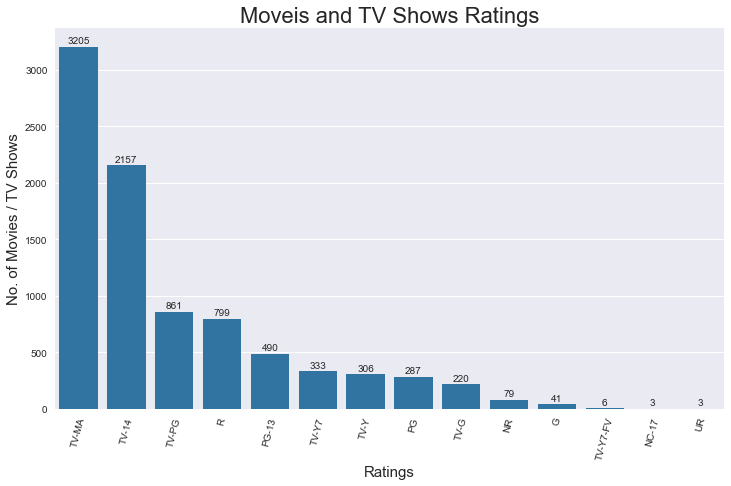

In [12]:
# compute total number or movies and TV shows in each rating
rating = df['rating'].value_counts()
# define color to use
color = sb.color_palette()[0]
# define figure size
plt.figure(figsize=(12,7))
# define style to use
style.use('seaborn')
# plot total number or movies and TV shows per rating
sb.countplot(data = df, x ='rating', color=color, order=rating.index)
# insert data labels
for index, data in enumerate(df['rating'].value_counts().values):
    plt.text(x= index, y=data+30, s=f'{data}', ha='center')
# set x-axis and y-axis labels
plt.xlabel("Ratings", fontsize=15)
plt.ylabel("No. of Movies / TV Shows", fontsize=15)
# set title
plt.title("Moveis and TV Shows Ratings",fontsize=22)
# rotate x-axis labels
plt.xticks(rotation = 75);

Comment

    Majority of the programmes added are for Mature Audiences and may not be suitable for ages 17 and under.

### Define Plot Function

In [13]:
# define function name and arguments
def count_plot(data, x, hue, x_label, y_label, title):
    # set figure size
    plt.figure(figsize=(15,7))
    # plot features of interest
    sb.countplot(data=data, x=x, hue=hue)
    # set x-axis label
    plt.xlabel(x_label, fontsize=15)
    # set y-axis label
    plt.ylabel(y_label, fontsize=15)
    # set chart title
    plt.title(title, fontsize=22)
    # plot legend
    plt.legend(loc='best')
    plt.show()

### What is the distribution of ratings by programme type?

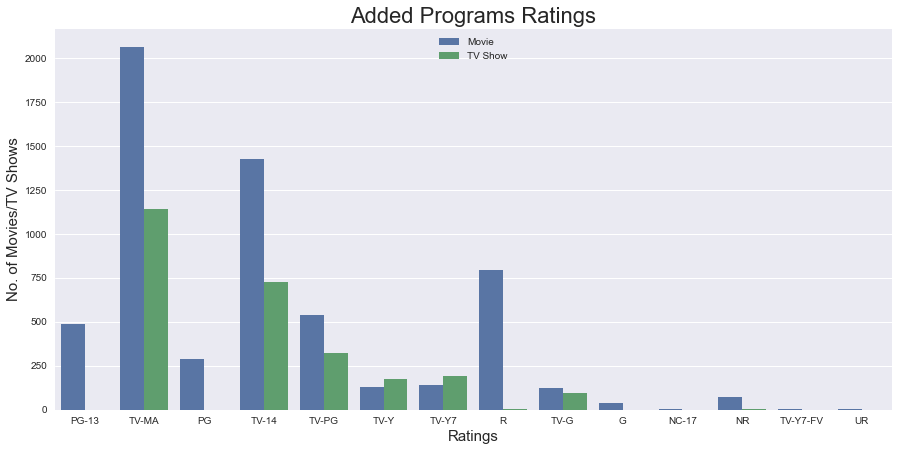

In [14]:
# plot ratings per type 
count_plot(df, df['rating'], df['type'], "Ratings", "No. of Movies/TV Shows", "Added Programs Ratings")

[Ratings Reference](https://help.netflix.com/en/node/2064/us)

Comment

   For ratings suitable for kids (i.e. TV-Y and TV-7) without parental guidance of any sort, most of these are TV-shows

### What is the Percentage Contribution Movies and TV-Shows?

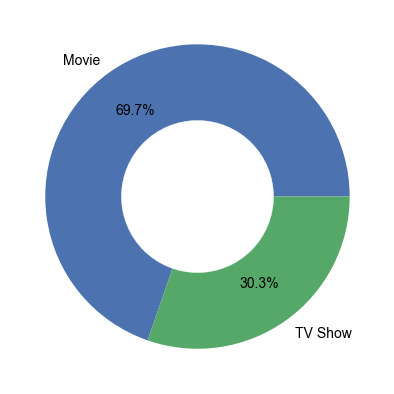

In [15]:
type_count = df['type'].value_counts()
plt.figure(figsize=(7,7))
# df.rating.value_counts().plot(kind = 'pie')
plt.pie(x=type_count, labels=type_count.keys(), autopct='%1.1f%%', pctdistance= 0.7, textprops={'fontsize':14, 'color':'k'})
inner_circle = plt.Circle((0,0), 0.5, color = 'White')
plot_figure = plt.gcf() # gcf means "get current figure"
plot_figure.gca().add_artist(inner_circle); # gca means "get current axis"

Comment

    69.7 %, approximately 6127 of all added title were that of movies and 30.3 % corresponding to 2663 were that of 
    TV-Shows

### What is the growth in added content over the years?

In [16]:
# split dataset into movie and TV-show titles
movies = df[df['type']=='Movie']
tv_show = df[df['type']=='TV Show']

In [17]:
# get counts of uniques years for Movies
movie_count = movies['year_added'].value_counts().reset_index() # resetting index produces a dataframe output
# rename columns of result from code above
movie_count = movie_count.rename(columns={'index':'year_added', 'year_added': 'number_of_movies'})
# sort results in ascendind order
movie_count = movie_count.sort_values('year_added')


# get counts of uniques years for TV-Shows
tv_show_count = tv_show['year_added'].value_counts().reset_index()
# rename columns of result from code above
tv_show_count = tv_show_count.rename(columns={'index':'year_added', 'year_added': 'number_of_shows'})
# sort results in ascendind order
tv_show_count = tv_show_count.sort_values('year_added')

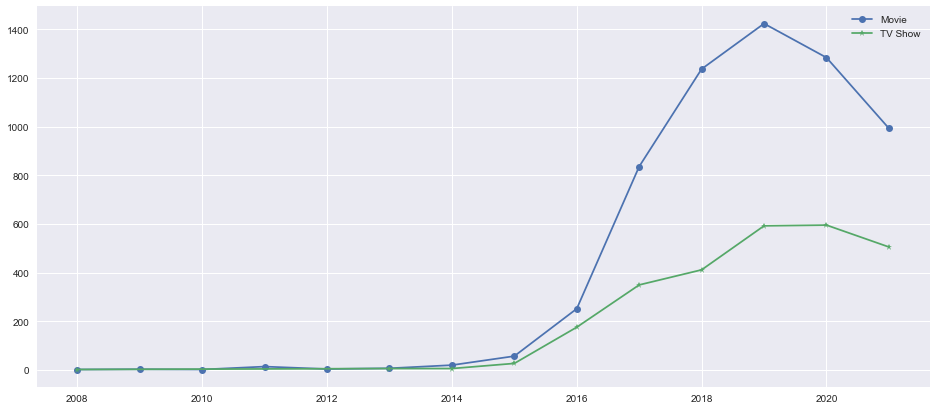

In [18]:
# set figure size
plt.figure(figsize=(16,7))
# plot line grapgh of number Movies and TV-Shows against the years they were added to Netflix
plt.plot(movie_count['year_added'], movie_count['number_of_movies'], '-o', label='Movie')
plt.plot(tv_show_count['year_added'], tv_show_count['number_of_shows'], '-*', label='TV Show')
# display legend
plt.legend();

Comment

    Generally, movie additions have increased over the years more than TV-Shows.
    
    Both saw little to no increase from 2008 till 2014 when TV-Shows pick up gradually whiles movies took a quick jump.
    
    Movie addition started declining again from 2019 wherease TV-Shows in 2019 to 2020 plateaued befor declining from 2020
    to 2021.

### Which year had most added titles with unknown / unnamed country of origin?

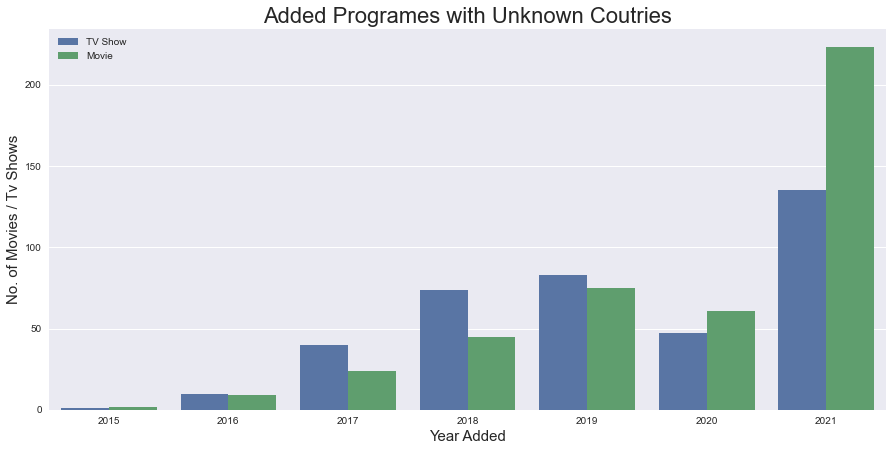

In [19]:
# filter dataset for all titles with no countries stated (unknown)
no_country = df.query('country == "unknown"')
# plot Movies / TV-Shows addtion from unknown countries over the years
count_plot(no_country, no_country['year_added'], no_country['type'],
                       "Year Added", "No. of Movies / Tv Shows", "Added Programes with Unknown Coutries")

Comment

    More TV-Shows than Movies were added with unknown coutries of origin from 2016 till 2019. The opposite was realized for 
    2020 and 2021.

# Word Cloud of Titles

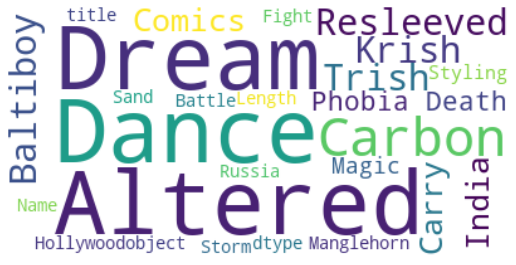

In [20]:
# Generate wordcloud
wordcloud = WordCloud(max_font_size=70, max_words=8000,background_color="white", stopwords=STOPWORDS).generate(str(df['title'].sample(1000)))
# Define figure size
plt.figure(figsize=(9,7))
# display image
plt.imshow(wordcloud, interpolation='bilinear')
# take off axis
plt.axis("off");